# Wine Fraud Detection

## Support Vector Machine Project

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired us to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


**This project uses the wine dataset to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**



### Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**Check target variable Quality**

In [5]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

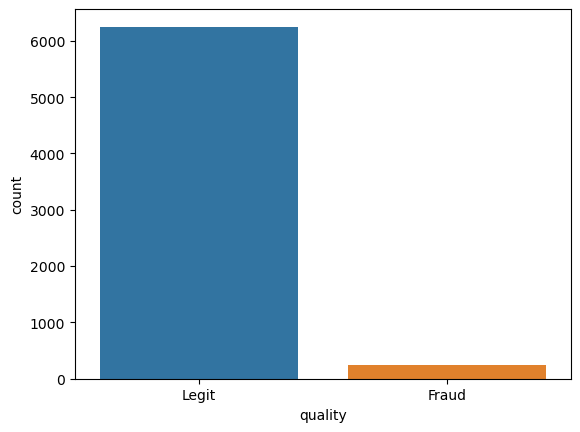

In [6]:
# plot value counts
sns.countplot(df, x='quality')

**Is a difference between red and white wine when it comes to fraud?**

<AxesSubplot:xlabel='type', ylabel='count'>

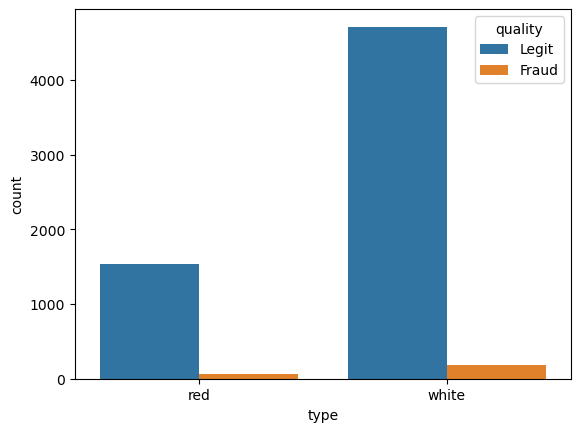

In [7]:
# There doesnt seem to be a difference 
sns.countplot(df, x='type', hue='quality')

**Percentage of Fraud wines per type**

In [8]:
percentage = 100*df.groupby(['type','quality']).agg(percentage=('alcohol','count'))/df.groupby(['type']).agg(percentage=('alcohol','count'))
percentage

percentage
type  quality            
red   Fraud      3.939962
      Legit     96.060038
white Fraud      3.736219
      Legit     96.263781

**Correlation of features agains target:quality**

In [9]:
# CODE HERE
df['quality'] = df['quality'].map({'Fraud': 1, 'Legit': 0})
df['type'] = df['type'].map({'red': 1, 'white': 0})

In [10]:
correlation = df.corr()['quality'].sort_values()[:-1]
correlation

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
type                    0.004598
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: quality, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'free sulfur dioxide'),
  Text(1, 0, 'citric acid'),
  Text(2, 0, 'alcohol'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'total sulfur dioxide'),
  Text(5, 0, 'sulphates'),
  Text(6, 0, 'type'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'fixed acidity'),
  Text(10, 0, 'chlorides'),
  Text(11, 0, 'volatile acidity')])

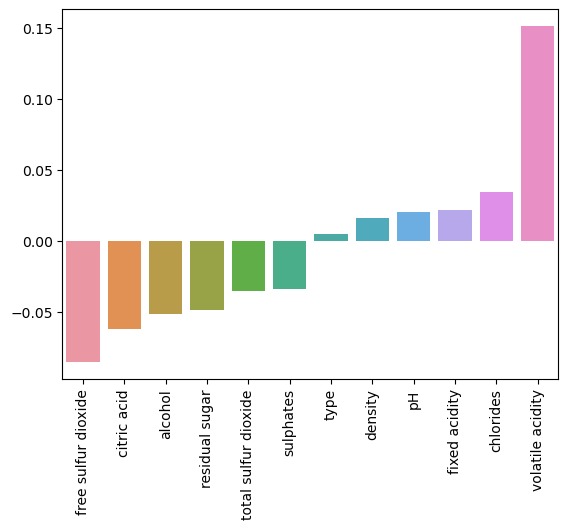

In [11]:
# correlation barplot
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)

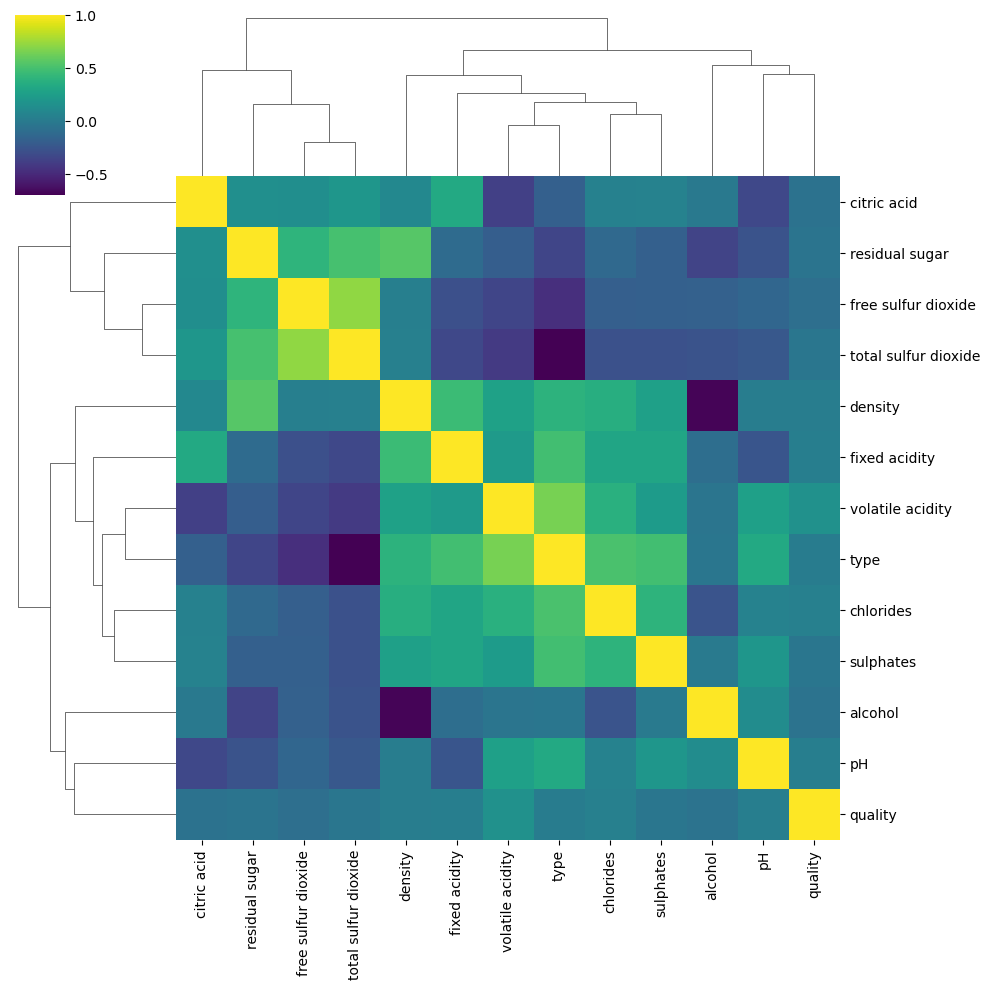

In [12]:
# correlation clustermap
sns.clustermap(df.corr(), cmap='viridis')


### Machine Learning Model


In [13]:
#Return quality to explicit names
df['quality'] = df['quality'].map({1: 'Fraud', 0: 'Legit'})

In [14]:
#data preprocessing
X = df.drop('quality', axis=1)
y = df['quality']

In [15]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [16]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
#create SVM model for classification. Balance dataset
from sklearn.svm import SVC
svc_model = SVC(class_weight='balanced')

In [18]:
#Grid search to optimize for C
param_grid = {'C' : [0.001,0.01,1,10,100,1000]}
from sklearn.model_selection import GridSearchCV
svc_grid = GridSearchCV(svc_model, param_grid)

In [19]:
#fit model
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000]})

In [20]:
#get best parameter C
svc_grid.best_params_

{'C': 1000}

**Reports**

In [21]:
from sklearn.metrics import plot_confusion_matrix, classification_report

C:\Users\neiza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


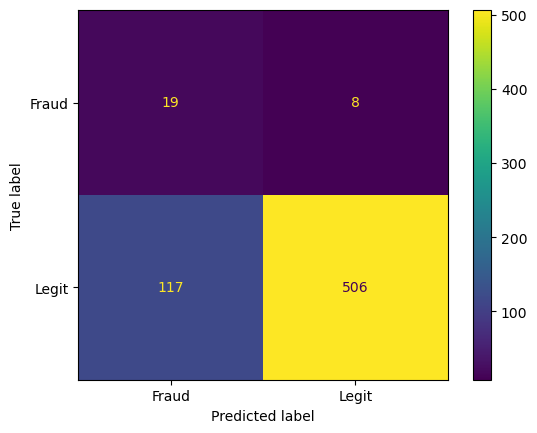

In [22]:
plot_confusion_matrix(svc_grid, X_test, y_test)

In [23]:
y_pred = svc_grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.14      0.70      0.23        27
       Legit       0.98      0.81      0.89       623

    accuracy                           0.81       650
   macro avg       0.56      0.76      0.56       650
weighted avg       0.95      0.81      0.86       650



**Conclusion**

The classification report above shows that the precision for fake wines is low. Precision measures the accuracy of positive predictions, while recall measures the completeness. The low precision (0.14) means that many wines were flagged as Fake when, in turn, they were Legit. In the end, the model performed quite poorly. This may suggest that there are better indicators to tell Fake and Legit wines apart than a chemical analysis. 

The recommendation for the customer is to collect the data for features like year produced, store sold, and warehouse stored that might be better predictors.   